### 1. Carregando Bibliotecas

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


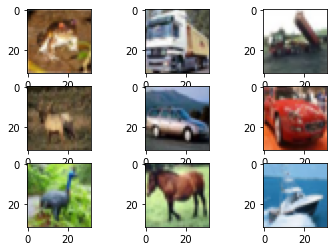

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [6]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [9]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [10]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [11]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [12]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

*   2 camadas convolucionais de tamanho progressivamente crescente
*   Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
*   Uma camada do tipo totalmente conectada de 120 neurônios
*   Uma camada do tipo totalmente conectada de 84 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=3,  activation='relu'))                         
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

In [14]:
model.add(Conv2D(filters=64, kernel_size=3,  activation='relu'))
#model.add(Conv2D(filters=100, kernel_size=5,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

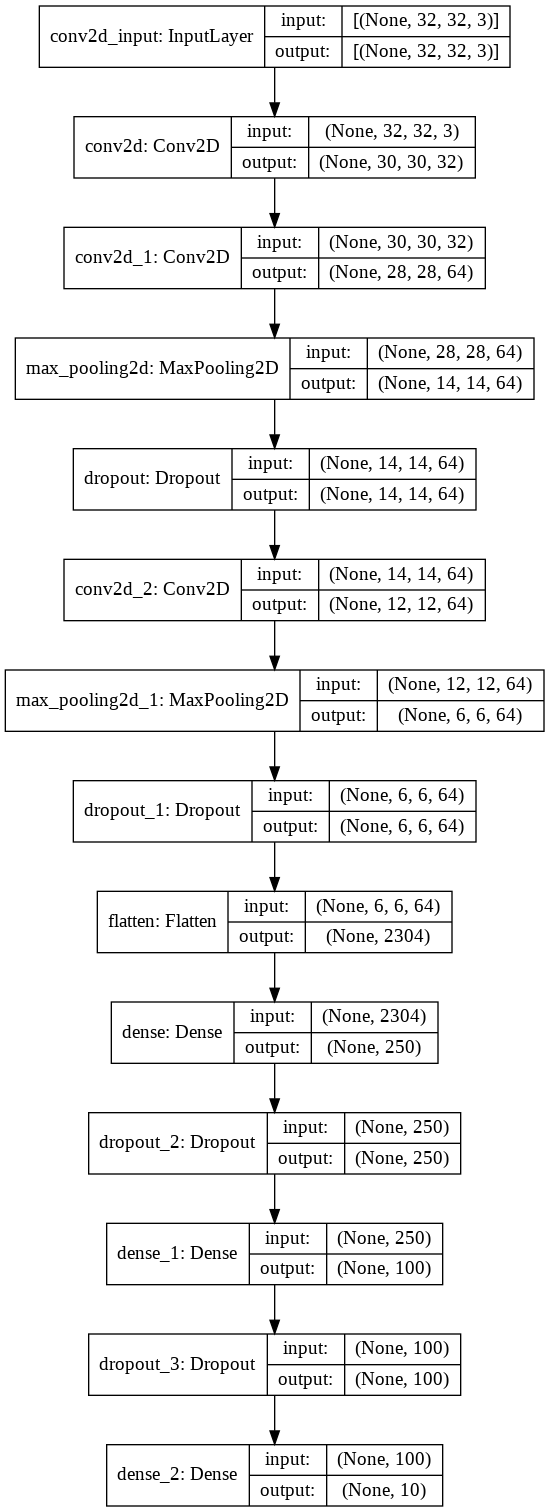

In [17]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

In [19]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [20]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = model.fit(x_train, y_train, batch_size=200, epochs=40, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/40
225/225 [==============================] - 19s 11ms/step - loss: 1.9777 - accuracy: 0.2573 - val_loss: 1.4096 - val_accuracy: 0.4966

Epoch 00001: val_accuracy improved from -inf to 0.49660, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
Epoch 2/40
225/225 [==============================] - 2s 8ms/step - loss: 1.3825 - accuracy: 0.4992 - val_loss: 1.1208 - val_accuracy: 0.6100

Epoch 00002: val_accuracy improved from 0.49660 to 0.61000, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
Epoch 3/40
225/225 [==============================] - 2s 8ms/step - loss: 1.1704 - accuracy: 0.5845 - val_loss: 1.0257 - val_accuracy: 0.6432

Epoch 00003: val_accuracy improved from 0.61000 to 0.64320, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5
Epoch 4/40
225/225 [==============================] - 2s 8ms/step - loss: 1.0281 - accuracy: 0.6374 - val_loss: 0.9124 - val_accuracy: 0.6806

Epoch 000

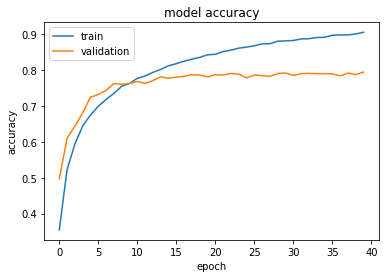

In [21]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [22]:
model = load_model("/content/drive/My Drive/checkpoints/modelocifar_FIAP_Shift.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7828999757766724


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [24]:
y_hat = model.predict(x_test)

In [25]:
y_hat[100,:]

array([4.1640238e-04, 2.6068963e-07, 9.1422755e-01, 6.1685294e-01,
       9.9988401e-01, 9.4036323e-01, 1.3547750e-04, 9.9946409e-01,
       7.5397540e-05, 7.8879565e-04], dtype=float32)

In [26]:
y_hat_classes = model.predict_classes(x_test)
y_hat_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7])

In [27]:
y_hat_classes[100]

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [28]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

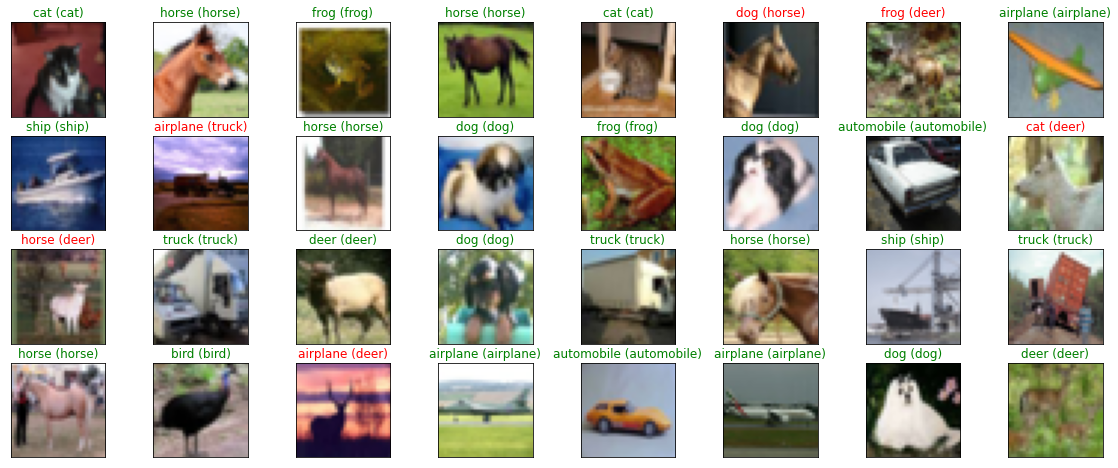

In [29]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
